In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
train_df = pd.read_csv("../input/nlp-getting-started/train.csv")
test_df = pd.read_csv("../input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#So data is fairly balanced

In [ ]:
print(f"Total Training Sample:{len(train_df)}")
print(f"Total Test Sample:{len(test_df)}")

Total Training Sample:7613
Total Test Sample:3263


In [ ]:
#Visulaizing some random training examples

import random
random_index = random.randint(0,len(train_df)-5)

#random indexes not higher than the total number of samples

for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
    _,text,target = row
    print(f"Target: {target}", "(real disaster)" if target>0 else ("not real disaster"))
    print(f"Text:\n{text}\n")
    print("...\n")

Target: 1 (real disaster)
Text:
There's a weird siren going off here...I hope Hunterston isn't in the process of blowing itself to smithereens...

...

Target: 0 not real disaster
Text:
@_RedDevil4Life_ @ManUtd destroyed!??

...

Target: 1 (real disaster)
Text:
the sunset boys wreck my bed   original 1979 usa gimp label  vinyl 7' 45  newave http://t.co/X0QLgwoyMT http://t.co/hQNx8qMeG3

...

Target: 0 not real disaster
Text:
Want Twister Tickets AND A CHANCE AT A VIP EXPERIENCE To See SHANIA!!! CLICK HERE: http://t.co/964dk4rwwe

...

Target: 1 (real disaster)
Text:
The Latest: More homes razed by Northern California wildfire - http://t.co/IrqUjaEsck http://t.co/qDwEknRMi9

...



SPLITTING INTO TRAIN AND TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),train_df_shuffled["target"].to_numpy(), test_size = 0.2, random_state = 42)


In [ ]:
len(train_sentences),len(train_labels),len(val_sentences) ,len(val_labels)

(6090, 6090, 1523, 1523)

In [ ]:
#Using TextVectorization

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = None, standardize = "lower_and_strip_punctuation", split = "whitespace", ngrams = None, output_mode = "int", output_sequence_length = None, pad_to_max_tokens = True)
#how many words in voca
#how to process text
#how to split tokens
#create group of n words
#mapping token to numbers
#length of output sequence

In [ ]:

# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#Fitting text_vectorizer on data
text_vectorizer.adapt(train_sentences)

In [ ]:
#Create Sample sentences and see tokenizinf
sample_sentence = "There is a volcano in my house"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 75,   9,   3, 488,   4,  13, 340,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#choose a random sentence and tokenize

random_sentence = random.choice(train_sentences)

print(f"Original Tezt:\n{random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])      

Original Tezt:
Discovered Plane Debris Is From Missing Malaysia Airlines Flight 370 | TIME http://t.co/7fSn1GeWUX

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1722,  651,  235,    9,   20,  377,  232, 1216,  980, 2951,   92,
           1,    0,    0,    0]])>

In [ ]:
#Get the unique words in vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
#most common tokens
bottom_5_words = words_in_vocab[-5:]
#least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['minded', 'mindblowing', 'milne', 'milledgeville', 'millcityio']


In [ ]:
#Creating Embeddings

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128, embeddings_initializer= "uniform", input_length = max_length)
# set input shape
#set size of embedding vector
#default
#how long is each input
embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version")


#Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Why did God order obliteration of ancient Canaanites? http://t.co/Sf2vwQvJYa

Embedded version


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03942269, -0.04073756, -0.02714663, ...,  0.02677531,
          0.01195153, -0.037313  ],
        [ 0.02047745, -0.02380016, -0.00914843, ...,  0.00224603,
         -0.02398517, -0.03503678],
        [-0.01894419, -0.00055505, -0.0007857 , ...,  0.00717359,
         -0.00910251,  0.03148905],
        ...,
        [ 0.04196638,  0.02324572, -0.01810043, ...,  0.03094679,
          0.04819911, -0.02932531],
        [ 0.04196638,  0.02324572, -0.01810043, ...,  0.03094679,
          0.04819911, -0.02932531],
        [ 0.04196638,  0.02324572, -0.01810043, ...,  0.03094679,
          0.04819911, -0.02932531]]], dtype=float32)>

**Model 0: Getting a baseline**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create tokenization and modeling pipeline

model_0 = Pipeline([("tfidf", TfidfVectorizer()), ("clf", MultinomialNB())])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baeline_score = model_0.score(val_sentences, val_labels)
print(f"Accuracy percentage: {baeline_score*100: .2f}%")

Accuracy percentage:  79.91%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
#Functions to evaulate: accuracy, precision, recall, f1-score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    #Model Accuracy, precision
    model_accuracy = accuracy_score(y_true, y_pred)*100
    
    #model precision, recall and f1 score
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results
    


In [ ]:
baseline_results = calculate_results(y_true = val_labels, y_pred = baseline_preds)

In [ ]:
baseline_results

{'accuracy': 79.9080761654629,
 'precision': 0.8146358812834972,
 'recall': 0.799080761654629,
 'f1': 0.7920155324845473}

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
#Create directory to save TensorBoard Logs
Save_dir = "model_logs"

In [ ]:
# Build a model with functional API
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Getting a summary

model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit the model
model_1_history = model_1.fit(train_sentences, train_labels, epochs = 5, validation_data = (val_sentences, val_labels), callbacks = [create_tensorboard_callback(dir_name = Save_dir, experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20210715-095803
Epoch 1/5
191/191 [==============================] - 4s 16ms/step - loss: 0.6059 - accuracy: 0.7984 - val_loss: 0.5233 - val_accuracy: 0.7695
Epoch 2/5
191/191 [==============================] - 3s 14ms/step - loss: 0.4115 - accuracy: 0.8581 - val_loss: 0.4681 - val_accuracy: 0.7905
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.3230 - accuracy: 0.8880 - val_loss: 0.4570 - val_accuracy: 0.7919
Epoch 4/5
191/191 [==============================] - 3s 14ms/step - loss: 0.2626 - accuracy: 0.9045 - val_loss: 0.4607 - val_accuracy: 0.7938
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.2200 - accuracy: 0.9238 - val_loss: 0.4732 - val_accuracy: 0.7938


In [ ]:
#Check the results
model_1.evaluate(val_sentences, val_labels)

48/48 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7938


[0.47319936752319336, 0.7938279509544373]

In [ ]:
##Make Predictions

model_1_pred_probs = model_1.predict(val_sentences)

In [ ]:
#Turn Prediction probabilities into single dimension tensor of floats

model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
#Calculating model_1 metrics

model_1_results = calculate_results(y_true = val_labels, y_pred = model_1_preds)

model_1_results

{'accuracy': 79.3827971109652,
 'precision': 0.7970938846184263,
 'recall': 0.793827971109652,
 'f1': 0.7904241228617522}

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.91, New accuracy: 79.38, Difference: -0.53
Baseline precision: 0.81, New precision: 0.80, Difference: -0.02
Baseline recall: 0.80, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00


In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Get the weight matrix of embedding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


**Model 2**

In [ ]:
# Create LSTM Model

from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)

# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)

x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
#Compile Model

model_2.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit Model

model_2_history = model_2.fit(train_sentences, train_labels, epochs = 5, validation_data =(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(Save_dir,"LSTM")]) 

Saving TensorBoard log files to: model_logs/LSTM/20210715-102221
Epoch 1/5
191/191 [==============================] - 7s 29ms/step - loss: 0.2755 - accuracy: 0.9199 - val_loss: 0.6066 - val_accuracy: 0.7768
Epoch 2/5
191/191 [==============================] - 5s 26ms/step - loss: 0.1150 - accuracy: 0.9586 - val_loss: 0.6477 - val_accuracy: 0.7919
Epoch 3/5
191/191 [==============================] - 5s 25ms/step - loss: 0.0839 - accuracy: 0.9684 - val_loss: 0.7750 - val_accuracy: 0.7807
Epoch 4/5
191/191 [==============================] - 5s 25ms/step - loss: 0.0698 - accuracy: 0.9725 - val_loss: 0.9904 - val_accuracy: 0.7774
Epoch 5/5
191/191 [==============================] - 5s 25ms/step - loss: 0.0555 - accuracy: 0.9759 - val_loss: 1.1262 - val_accuracy: 0.7787


In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [ ]:

# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.8726198292843,
 'precision': 0.7784613325959734,
 'recall': 0.7787261982928431,
 'f1': 0.7769490360712006}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.91, New accuracy: 77.87, Difference: -2.04
Baseline precision: 0.81, New precision: 0.78, Difference: -0.04
Baseline recall: 0.80, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.78, Difference: -0.02


**MODEL 3**

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:

# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:

# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(Save_dir, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20210715-102608
Epoch 1/5
191/191 [==============================] - 8s 29ms/step - loss: 0.2695 - accuracy: 0.8887 - val_loss: 0.7017 - val_accuracy: 0.7840
Epoch 2/5
191/191 [==============================] - 4s 24ms/step - loss: 0.0632 - accuracy: 0.9763 - val_loss: 0.8393 - val_accuracy: 0.7761
Epoch 3/5
191/191 [==============================] - 5s 24ms/step - loss: 0.0553 - accuracy: 0.9773 - val_loss: 0.8474 - val_accuracy: 0.7715
Epoch 4/5
191/191 [==============================] - 5s 24ms/step - loss: 0.0467 - accuracy: 0.9820 - val_loss: 1.0665 - val_accuracy: 0.7498
Epoch 5/5
191/191 [==============================] - 5s 24ms/step - loss: 0.0405 - accuracy: 0.9828 - val_loss: 1.1728 - val_accuracy: 0.7617


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:

# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.16546290216678,
 'precision': 0.7607531392375166,
 'recall': 0.7616546290216678,
 'f1': 0.7605862070909477}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.91, New accuracy: 76.17, Difference: -3.74
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.80, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


**Model 4**

In [ ]:
# Build a Bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:

# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(Save_dir, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20210715-102920
Epoch 1/5
191/191 [==============================] - 10s 36ms/step - loss: 0.1928 - accuracy: 0.9381 - val_loss: 1.0600 - val_accuracy: 0.7636
Epoch 2/5
191/191 [==============================] - 6s 30ms/step - loss: 0.0396 - accuracy: 0.9843 - val_loss: 1.0446 - val_accuracy: 0.7800
Epoch 3/5
191/191 [==============================] - 5s 28ms/step - loss: 0.0353 - accuracy: 0.9852 - val_loss: 1.4132 - val_accuracy: 0.7571
Epoch 4/5
191/191 [==============================] - 6s 29ms/step - loss: 0.0348 - accuracy: 0.9816 - val_loss: 1.4370 - val_accuracy: 0.7630
Epoch 5/5
191/191 [==============================] - 6s 29ms/step - loss: 0.0255 - accuracy: 0.9872 - val_loss: 1.4360 - val_accuracy: 0.7636


In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.36244254760342,
 'precision': 0.763602626783531,
 'recall': 0.7636244254760342,
 'f1': 0.7610943697612657}

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.91, New accuracy: 76.36, Difference: -3.55
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.80, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


**Model 5**

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.01222829,  0.02020211,  0.04050673, ..., -0.00468382,
           0.00272599, -0.03290401],
         [-0.00225387, -0.04199347,  0.00904611, ...,  0.0401274 ,
          -0.02383126,  0.002302  ],
         [ 0.0088272 , -0.04432634, -0.02652862, ...,  0.0648296 ,
           0.02408241,  0.06315278],
         ...,
         [ 0.00601139, -0.01532459,  0.00082317, ...,  0.07736067,
           0.03500706,  0.0274146 ],
         [ 0.00601139, -0.01532459,  0.00082317, ...,  0.07736067,
           0.03500706,  0.0274146 ],
         [ 0.00601139, -0.01532459,  0.00082317, ...,  0.07736067,
           0.03500706,  0.0274146 ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.05373407, 0.01365487, 0.        , 0.15379947, 0.        ,
          0.        , 0.        , 0.        , 0.00783829, 0.        ,
          0.        , 0.25949144, 0.02561532, 0.        , 0.21585411,
          0.        , 0.

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            20512     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
__________________________________________

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(Save_dir, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210715-103642
Epoch 1/5
191/191 [==============================] - 4s 17ms/step - loss: 0.2311 - accuracy: 0.8973 - val_loss: 0.7942 - val_accuracy: 0.7636
Epoch 2/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0627 - accuracy: 0.9799 - val_loss: 0.9351 - val_accuracy: 0.7577
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0460 - accuracy: 0.9839 - val_loss: 1.0390 - val_accuracy: 0.7492
Epoch 4/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0404 - accuracy: 0.9819 - val_loss: 1.0957 - val_accuracy: 0.7630
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0409 - accuracy: 0.9829 - val_loss: 1.1637 - val_accuracy: 0.7571


In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[4.2496729e-01],
       [8.7131274e-01],
       [9.9998748e-01],
       [2.0816326e-03],
       [9.7802849e-06],
       [9.9741733e-01],
       [9.9846679e-01],
       [9.9999857e-01],
       [9.9998868e-01],
       [6.9839287e-01]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)

model_5_results

{'accuracy': 75.70584372948129,
 'precision': 0.7561940396416831,
 'recall': 0.7570584372948129,
 'f1': 0.7562875015251737}

In [ ]:
# Compare model_5 results to baseline 
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.91, New accuracy: 75.71, Difference: -4.20
Baseline precision: 0.81, New precision: 0.76, Difference: -0.06
Baseline recall: 0.80, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.04


**Model 6**

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.03763314  0.02311836 -0.04823807  0.03391771  0.00569051 -0.03389036
  0.05732137  0.03828164 -0.031068   -0.00181056  0.01579181 -0.04580212
  0.04477533  0.09405877 -0.01465149 -0.06734521 -0.06948058  0.02584651
 -0.04218359 -0.05246001 -0.02698393 -0.007941    0.02193376  0.08175396
 -0.06261753 -0.05221808 -0.00651491 -0.02335291 -0.02098896  0.00381878
 -0.07757618 -0.05496265 -0.03320872  0.0780331   0.02204841  0.03197753
 -0.0077296   0.02316547 -0.03670651  0.03832511 -0.05869983  0.01449938
  0.00187125  0.07395205 -0.09248019  0.01320577 -0.01217452 -0.03436945
  0.02304205 -0.07155036], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(Save_dir, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210715-104124
Epoch 1/5
191/191 [==============================] - 10s 37ms/step - loss: 0.5902 - accuracy: 0.7251 - val_loss: 0.4477 - val_accuracy: 0.7965
Epoch 2/5
191/191 [==============================] - 2s 13ms/step - loss: 0.4043 - accuracy: 0.8212 - val_loss: 0.4433 - val_accuracy: 0.7978
Epoch 3/5
191/191 [==============================] - 2s 13ms/step - loss: 0.3958 - accuracy: 0.8271 - val_loss: 0.4421 - val_accuracy: 0.8017
Epoch 4/5
191/191 [==============================] - 2s 13ms/step - loss: 0.4017 - accuracy: 0.8171 - val_loss: 0.4424 - val_accuracy: 0.8056
Epoch 5/5
191/191 [==============================] - 2s 13ms/step - loss: 0.3781 - accuracy: 0.8348 - val_loss: 0.4367 - val_accuracy: 0.8076


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 80.76165462902168,
 'precision': 0.807709134632004,
 'recall': 0.8076165462902167,
 'f1': 0.8062399846321143}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.91, New accuracy: 80.76, Difference: 0.85
Baseline precision: 0.81, New precision: 0.81, Difference: -0.01
Baseline recall: 0.80, New recall: 0.81, Difference: 0.01
Baseline f1: 0.79, New f1: 0.81, Difference: 0.01


**Comparing Performance**

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.908076,0.814636,0.799081,0.792016
simple_dense,79.382797,0.797094,0.793828,0.790424
lstm,77.872620,0.778461,0.778726,0.776949
gru,76.165463,0.760753,0.761655,0.760586
bidirectional,76.362443,0.763603,0.763624,0.761094
conv1d,75.705844,0.756194,0.757058,0.756288
tf_hub_sentence_encoder,80.761655,0.807709,0.807617,0.806240


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

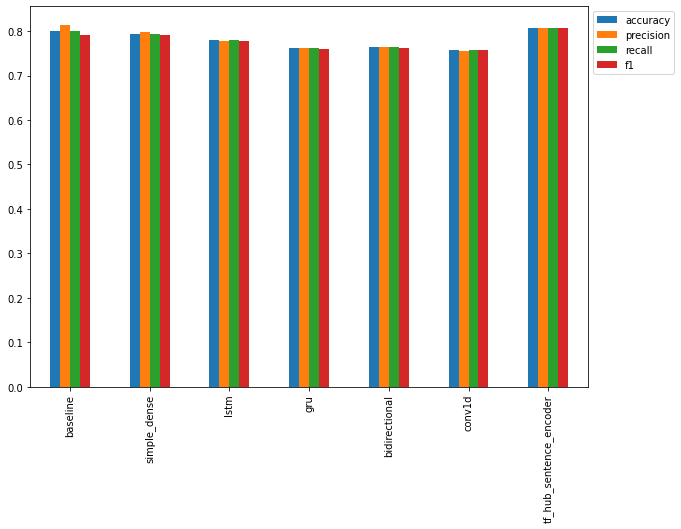

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));